#Time Series Analysis on Power generation Data

##Installation of Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import ccovf,ccf 
from statsmodels.tsa.seasonal import seasonal_decompose

##Reading the Data

In [ ]:
df_org = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My project/PowerGeneration.csv')

##EDA & Preprocessing of Data

In [ ]:
df_org.head(10)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.40,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.00,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.00,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.00,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.30,2697.65,77.65,2620.0,0,39,17,-21.69,0.0
5,2017-09-01,Rajasthan,6864.80,3283.50,1410.00,1505.0,0,83,69,-14.41,0.0
6,2017-09-01,Uttarakhand,1252.15,334.00,258.00,76.0,0,19,19,0.11,0.0
7,2017-09-01,Uttar Pradesh,6274.60,2505.60,377.00,2128.6,0,103,68,-35.29,0.0
8,2017-09-01,ADHPL,192.00,0.00,0.00,0.0,0,2,3,1.05,0.0
9,2017-09-01,AHPC (GVK),330.00,0.00,0.00,0.0,0,6,8,1.37,0.0


In [ ]:
df_org['Power Station'].unique()

array(['Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Punjab', 'Rajasthan', 'Uttarakhand', 'Uttar Pradesh', 'ADHPL',
       'AHPC (GVK)', 'APCPL', 'APL', 'BEPL', 'DAE', 'E.P.P.L.', 'GBHPPL',
       'GIPL', 'GPGSL (GVK)', 'HBPCL', 'HSPCL', 'IAEPL', 'JhPL(HR)',
       'JPPVL', 'LAPPL', 'LPGCL', 'MPCL', 'MUNPL', 'NDPL', 'NHPC', 'NLC',
       'NPCIL', 'NPL', 'NTPC Ltd.', 'NTPGPL', 'PPGCL (Jaypee)', 'RPSCL',
       'RWPL (JSW)', 'SJVNL', 'SrEPL', 'THDC', 'TSPL', 'Chhatisgarh',
       'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'ACB', 'AMNEPL',
       'BALCO', 'BLAPPL', 'CGPL', 'CLPINDIA', 'DBPCL', 'DIPL', 'DLHP',
       'EPGL', 'ESSAR', 'ESSARPMPL', 'GCEL', 'GEPL', 'GIPCL', 'GMR ENERG',
       'IEPL', 'JHAPL', 'JPL', 'JSWEL', 'KWPCL', 'LANCO', 'LVTPL',
       'MBPMPL', 'MCCPL', 'NHDC', 'NSPCL', 'PGPL', 'RATTANINDIA',
       'RELIANCE', 'RGPPL', 'RIL (DAHANU)', 'RKMPPL', 'SCPL', 'SKS',
       'SMHPCL', 'SPL', 'SVPPL', 'TATA MAH.', 'TATA PCL',
       'TOR. POW. (SUGEN)',

In [ ]:
df=df_org[df_org['Power Station']=='Maharashtra']

In [ ]:
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
44,2017-09-01,Maharashtra,13248.0,5534.0,630.0,4460.0,0,158,114,-44.78,0.0
220,2017-09-02,Maharashtra,13248.0,5534.0,630.0,4460.0,0,158,110,-48.40,0.0
396,2017-09-03,Maharashtra,13248.0,710.0,0.0,710.0,0,158,103,-55.45,0.0
572,2017-09-04,Maharashtra,13248.0,2056.0,420.0,1420.0,0,158,131,-27.05,0.0
748,2017-09-05,Maharashtra,13248.0,1556.0,420.0,920.0,0,158,129,-29.51,0.0


In [ ]:
df['Dates']=pd.to_datetime(df['Dates'])
df.set_index('Dates',inplace=True)
#df.index=pd.DatetimeIndex(df['Dates'].asfreq(freq='D'))

In [ ]:
df.index

DatetimeIndex(['2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10',
               ...
               '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07',
               '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11',
               '2022-04-12', '2022-04-13'],
              dtype='datetime64[ns]', name='Dates', length=1934, freq=None)

In [ ]:
df = df.resample('D').first()


In [ ]:
df.index

DatetimeIndex(['2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10',
               ...
               '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16',
               '2022-12-17', '2022-12-18', '2022-12-19', '2022-12-20',
               '2022-12-21', '2022-12-22'],
              dtype='datetime64[ns]', name='Dates', length=1939, freq='D')

In [ ]:
df

,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
Dates,,,,,,,,,,
2017-09-01,Maharashtra,13248.0,5534.0,630.0,4460.0,0.0,158.0,114.0,-44.78,0.00
2017-09-02,Maharashtra,13248.0,5534.0,630.0,4460.0,0.0,158.0,110.0,-48.40,0.00
2017-09-03,Maharashtra,13248.0,710.0,0.0,710.0,0.0,158.0,103.0,-55.45,0.00
2017-09-04,Maharashtra,13248.0,2056.0,420.0,1420.0,0.0,158.0,131.0,-27.05,0.00
2017-09-05,Maharashtra,13248.0,1556.0,420.0,920.0,0.0,158.0,129.0,-29.51,0.00
...,...,...,...,...,...,...,...,...,...,...
2022-12-18,Maharashtra,12778.0,2109.0,125.0,1528.0,456.0,0.0,164.0,5.18,3.26
2022-12-19,Maharashtra,12778.0,1489.0,125.0,1028.0,336.0,0.0,169.0,10.17,6.39
2022-12-20,Maharashtra,12778.0,1489.0,125.0,1028.0,336.0,0.0,173.0,14.56,9.15


In [ ]:
df.tail()

,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
Dates,,,,,,,,,,
2022-12-18,Maharashtra,12778.0,2109.0,125.0,1528.0,456.0,0.0,164.0,5.18,3.26
2022-12-19,Maharashtra,12778.0,1489.0,125.0,1028.0,336.0,0.0,169.0,10.17,6.39
2022-12-20,Maharashtra,12778.0,1489.0,125.0,1028.0,336.0,0.0,173.0,14.56,9.15
2022-12-21,Maharashtra,12778.0,1279.0,125.0,818.0,336.0,0.0,175.0,16.68,10.49
2022-12-22,Maharashtra,12778.0,1279.0,125.0,818.0,336.0,0.0,177.0,18.47,11.61


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1939 entries, 2017-09-01 to 2022-12-22
Freq: D
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Power Station                     1857 non-null   object 
 1   Monitored Cap.(MW)                1857 non-null   float64
 2   Total Cap. Under Maintenace (MW)  1857 non-null   float64
 3   Planned Maintanence (MW)          1857 non-null   float64
 4   Forced Maintanence(MW)            1857 non-null   float64
 5   Other Reasons (MW)                1857 non-null   float64
 6   Programme or Expected(MU)         1857 non-null   float64
 7   Actual(MU)                        1857 non-null   float64
 8   Excess(+) / Shortfall (-)         1857 non-null   float64
 9   Deviation                         1857 non-null   float64
dtypes: float64(9), object(1)
memory usage: 166.6+ KB


In [ ]:
df.describe()

,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
count,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000
mean,13093.315024,3387.387722,584.898223,2449.520732,43.456651,135.078083,144.577275,-18.578336,-0.093974
std,239.166838,1203.206245,456.217272,1054.820524,127.757892,59.421564,26.424840,22.065011,1.407773
min,12778.000000,341.000000,0.000000,108.000000,0.000000,0.000000,55.000000,-106.620000,-22.730000
25%,12778.000000,2589.000000,250.000000,1633.000000,0.000000,144.000000,128.000000,-30.210000,0.000000
50%,12988.000000,3391.000000,460.000000,2426.000000,0.000000,159.000000,145.000000,-16.800000,0.000000
75%,13248.000000,4151.000000,770.000000,3100.000000,0.000000,167.000000,162.000000,-4.200000,0.000000
max,13408.000000,7131.000000,2200.000000,6090.000000,1648.000000,187.000000,221.000000,49.820000,14.430000


In [ ]:
df.shape

(1939, 10)

In [ ]:
df[df.isna().any(axis=1)]

,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
Dates,,,,,,,,,,
2017-10-02,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-19,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-26,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-03,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-04,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-05-30,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-04,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Actual(MU)'].isnull().sum()

82

In [ ]:
df['Power Station'].unique()

array(['Maharashtra', None], dtype=object)

In [ ]:
df.ffill(axis = 0,inplace=True)

In [ ]:
df[df.isna().any(axis=1)]

,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
Dates,,,,,,,,,,


##Visualizing the Data

Text(0.5, 1.0, 'Visualization of Power Generation Data')

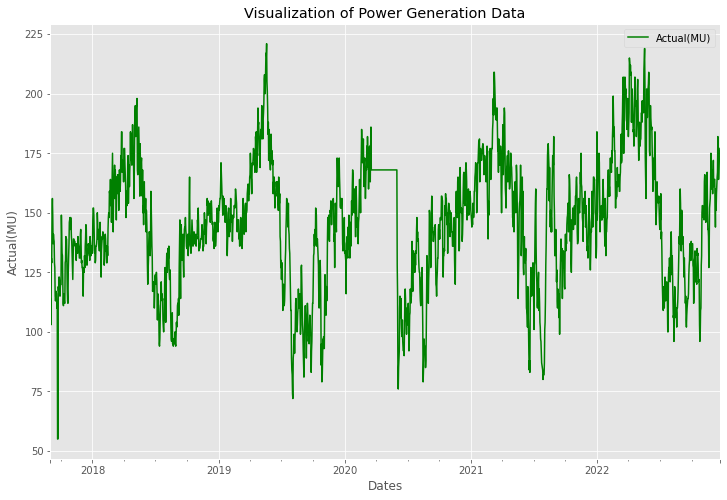

In [ ]:
plt.style.use('ggplot')
df['Actual(MU)'].plot(color='g',legend=True,figsize=(12,8))
plt.ylabel('Actual(MU)')
plt.title('Visualization of Power Generation Data')

<Figure size 864x720 with 0 Axes>

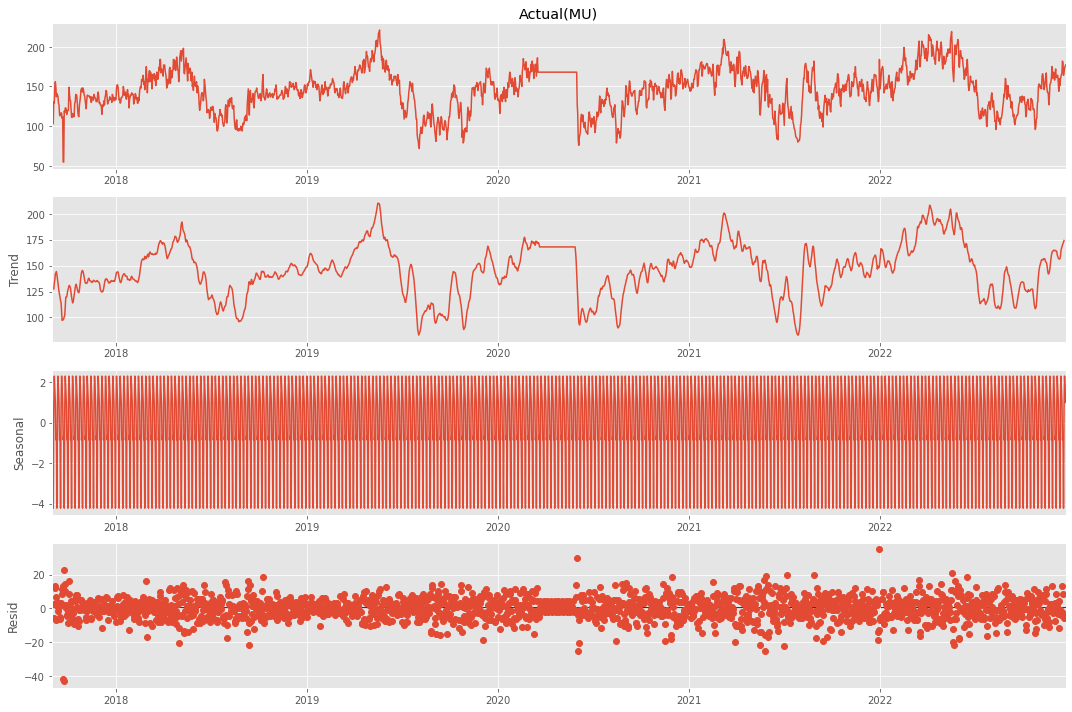

In [ ]:
plt.figure(figsize=(12,10))
seasonal_decompose(df['Actual(MU)'],model='additive').plot();

In [ ]:
df_sample=df.loc['2018-01-01':'2019-01-01',]

<Figure size 864x720 with 0 Axes>

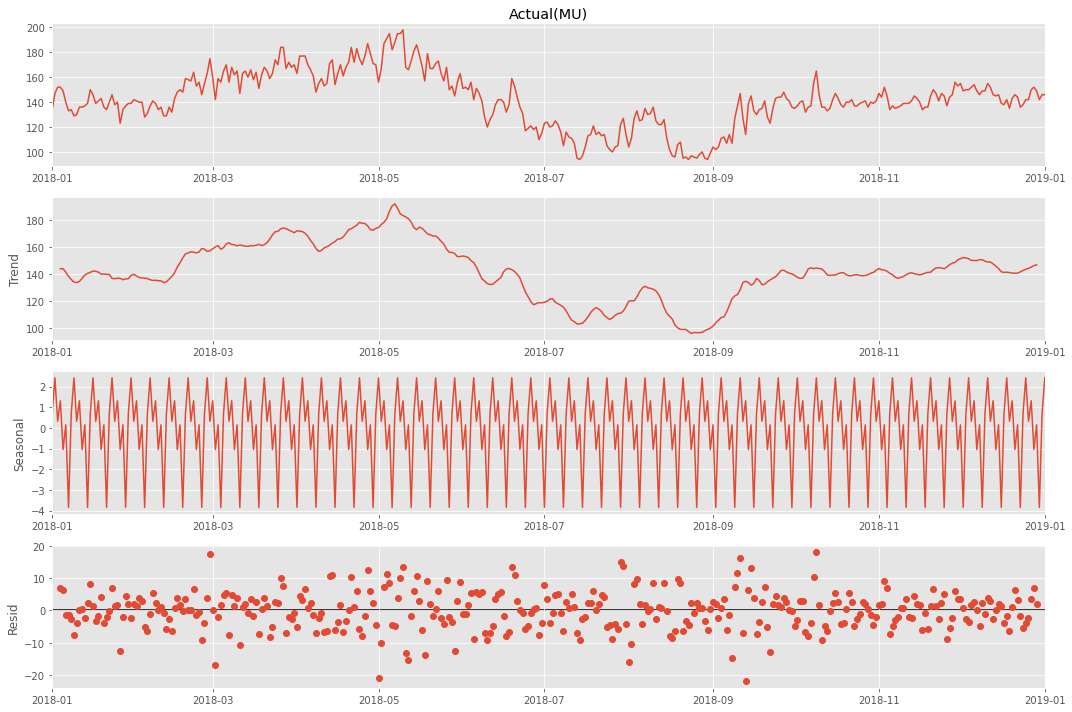

In [ ]:
plt.figure(figsize=(12,10))
seasonal_decompose(df_sample['Actual(MU)'],model='additive').plot();

In [ ]:
def adf_test(dataset):
     results = adfuller(dataset, autolag = 'AIC')
     print("ADF : ",results[0])
     print("P-Value : ", results[1])
     print("Num Of Lags : ", results[2])
     print("Num Of Observations Used For ADF Regression:",results[3])
     print("Critical Values :")
     for key, val in results[4].items():
         print("\t",key, ": ", val)

In [ ]:
adf_test(df['Actual(MU)'])

ADF :  -4.098826212897446
P-Value :  0.0009728603861776502
Num Of Lags :  22
Num Of Observations Used For ADF Regression: 1916
Critical Values :
	 1% :  -3.433767579644038
	 5% :  -2.8630496663460607
	 10% :  -2.567573687930666


In [ ]:
adf_test(df['Actual(MU)'])

ADF :  -4.098826212897446
P-Value :  0.0009728603861776502
Num Of Lags :  22
Num Of Observations Used For ADF Regression: 1916
Critical Values :
	 1% :  -3.433767579644038
	 5% :  -2.8630496663460607
	 10% :  -2.567573687930666


In [ ]:
df.shape

(1939, 10)

In [ ]:
df = df[['Actual(MU)']]

## Train-test Split

In [ ]:
train =df.iloc[:len(df)-365]
test = df.iloc[-365:]

In [ ]:
train.tail()

,Actual(MU)
Dates,
2021-12-18,151.0
2021-12-19,144.0
2021-12-20,156.0
2021-12-21,165.0
2021-12-22,165.0


In [ ]:
test.head()

,Actual(MU)
Dates,
2021-12-23,163.0
2021-12-24,164.0
2021-12-25,158.0
2021-12-26,150.0
2021-12-27,149.0


## Model Implmentation

In [ ]:
import statsmodels.tsa.api
from statsmodels.tsa.api import ExponentialSmoothing,  SimpleExpSmoothing, Holt

2021-12-23    164.898771
2021-12-24    164.898771
2021-12-25    164.898771
2021-12-26    164.898771
2021-12-27    164.898771
                 ...    
2022-12-18    164.898771
2022-12-19    164.898771
2022-12-20    164.898771
2022-12-21    164.898771
2022-12-22    164.898771
Freq: D, Name: alpha=0.9, Length: 365, dtype: float64


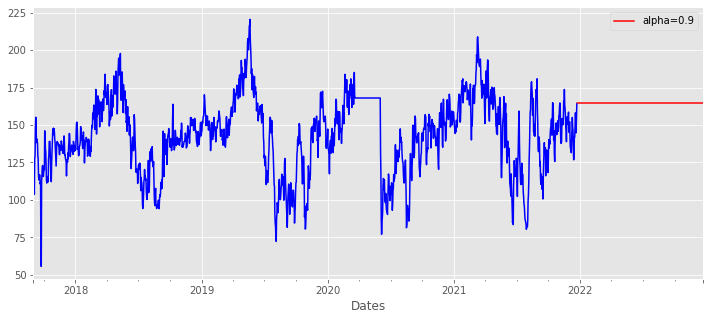

In [ ]:
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.9,optimized=False)
fcast = fit1.forecast(365).rename('alpha=0.9')
print(fcast)
fcast.plot( color = 'red', legend=True, figsize=(12,5))
fit1.fittedvalues.plot(color='blue')
plt.show()

2021-12-23    164.993905
2021-12-24    164.993905
2021-12-25    164.993905
2021-12-26    164.993905
2021-12-27    164.993905
                 ...    
2022-12-18    164.993905
2022-12-19    164.993905
2022-12-20    164.993905
2022-12-21    164.993905
2022-12-22    164.993905
Freq: D, Name: alpha=0.9744033304121954, Length: 365, dtype: float64


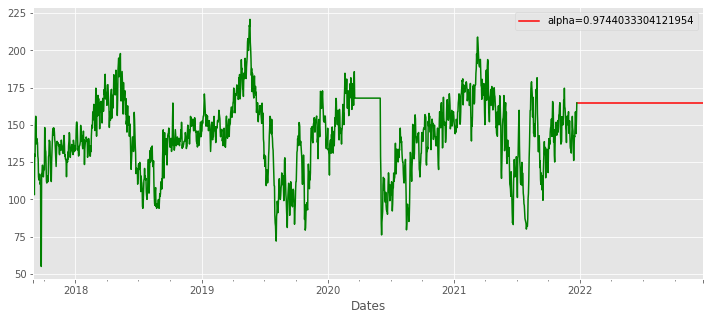

In [ ]:
fit1 = SimpleExpSmoothing(train).fit(optimized=True)
fcast= fit1.forecast(365).rename('alpha=%s'%fit1.model.params['smoothing_level'])#this line is for legend alpha
print(fcast)
fcast.plot( color = 'red', legend=True, figsize=(12,5))
fit1.fittedvalues.plot(color='green')
plt.show()

2021-12-23    139.541188
2021-12-24    143.353352
2021-12-25    136.912330
2021-12-26    138.655470
2021-12-27    140.657478
                 ...    
2022-12-18    169.755259
2022-12-19    169.301051
2022-12-20    169.805948
2022-12-21    170.738358
2022-12-22    168.013514
Freq: D, Length: 365, dtype: float64


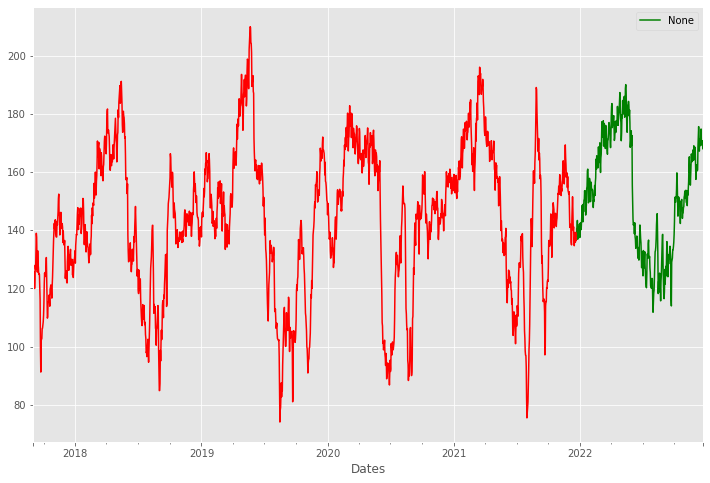

In [ ]:
model = ExponentialSmoothing(train, seasonal_periods= 365, trend = 'add', seasonal='add').fit(smoothing_level=.1,smoothing_slope=.085, smoothing_seasonal=.1)
model.fittedvalues.plot(color='red')
pred = model.forecast(365)
print(pred)
pred.plot(color='green',legend=True, figsize=(12,8))

2021-12-23    146.375570
2021-12-24    150.096622
2021-12-25    143.553666
2021-12-26    145.161786
2021-12-27    147.014223
                 ...    
2022-12-18    149.038762
2022-12-19    148.534025
2022-12-20    149.052842
2022-12-21    149.982134
2022-12-22    147.917540
Freq: D, Length: 365, dtype: float64


Text(0, 0.5, 'Actual(MU)')

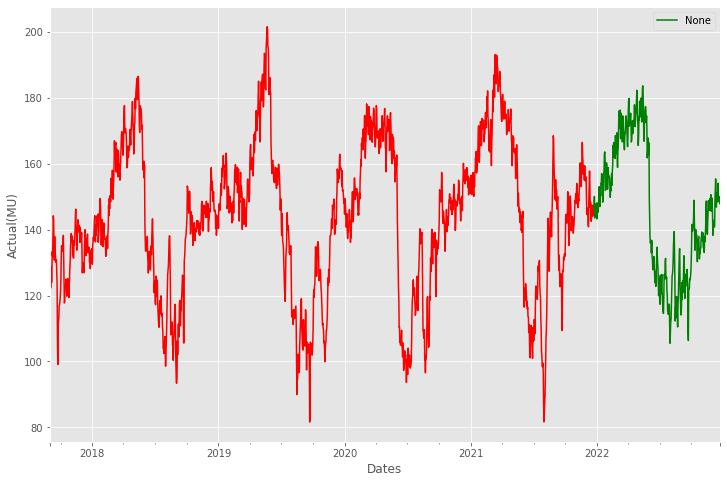

In [ ]:
model = ExponentialSmoothing(train, seasonal_periods= 365, trend = 'add', seasonal='add').fit(smoothing_level=.1, smoothing_seasonal=.1)
model.fittedvalues.plot(color='red')
pred = model.forecast(365)
print(pred)
pred.plot(color='green',legend=True, figsize=(12,8))
plt.ylabel('Actual(MU)')

Text(0.5, 1.0, 'Plotting of original Vs predicted values')

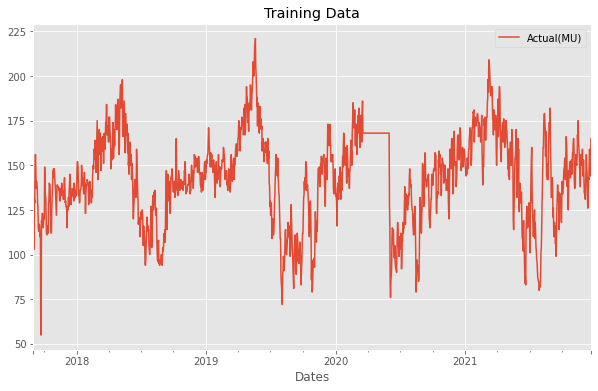

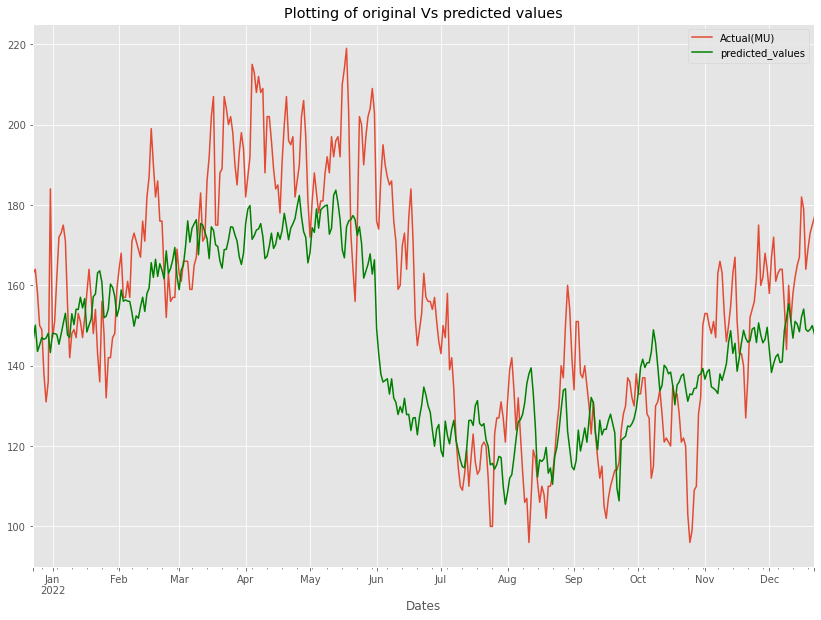

In [ ]:
train.plot(legend=True, label='train', figsize=(10,6))
plt.title('Training Data')
test.plot(legend=True, label='test')
pred.plot(legend=True, label='predicted_values',color='g',figsize=(14,10))
plt.title('Plotting of original Vs predicted values')
#plt.figure(figsize=(10,12))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [ ]:
np.sqrt(mean_squared_error(test,pred))

21.021129905682386

In [ ]:
mean_absolute_percentage_error??

In [ ]:
mean_absolute_percentage_error(test,pred)

0.10775841059981281

In [ ]:
mean_absolute_error(test,pred)

17.024000758357534

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima

In [ ]:
df.head()

,Actual(MU)
Dates,
2017-09-01,114.0
2017-09-02,110.0
2017-09-03,103.0
2017-09-04,131.0
2017-09-05,129.0


In [ ]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11073.285, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11115.225, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11116.481, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11116.352, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11113.249, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11070.591, Time=1.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11110.665, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11067.501, Time=1.62 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11083.377, Time=1.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=11069.200, Time=3.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11068.324, Time=3.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11072.521, Time=1.69 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11073.514, Time=0.66 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=11069.694, Time=2.31 sec
 ARIMA(3,1,1)(0,0,0

In [ ]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11073.285, Time=2.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11115.225, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11116.481, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11116.352, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11113.249, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11070.591, Time=3.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11110.665, Time=0.82 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11067.501, Time=1.71 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11083.377, Time=0.61 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=11069.200, Time=1.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11068.324, Time=2.94 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11072.521, Time=1.69 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11073.514, Time=1.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=11069.694, Time=4.57 sec
 ARIMA(3,1,1)(0,0,0

In [ ]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
best_model = ARIMA(train,order=(3,1,1))
results = model.fit(train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1574
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -5527.770
Date:                Sat, 04 Feb 2023   AIC                          11065.539
Time:                        06:53:14   BIC                          11092.343
Sample:                    09-01-2017   HQIC                         11075.501
                         - 12-22-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5423      0.092      5.908      0.000       0.362       0.722
ar.L2         -0.0601      0.021     -2.843      0.004      -0.102      -0.019
ar.L3         -0.0998      0.029     -3.490      0.000      -0.156      -0.044
ma.L1         -0.5928      0.090     -6.553      0.000      -0.770      -0.415
sigma2        66.0467      1.380     47.861      0.000      63.342      68.751
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1176.82
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.16
Prob(H) (two-sided):                  0.03   Kurtosis:                         7.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=(len(train)+len(test))-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(3,1,1) Predictions')

Text(0.5, 1.0, 'Plotting of original Vs predicted values')

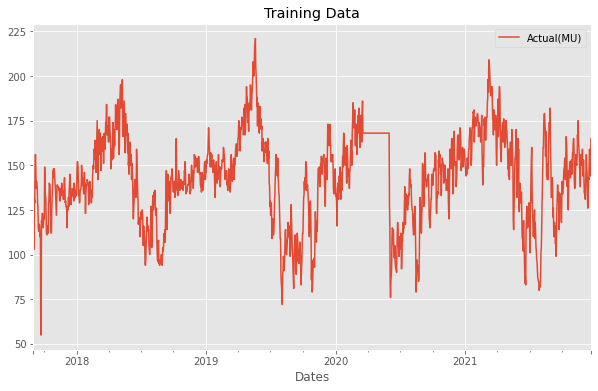

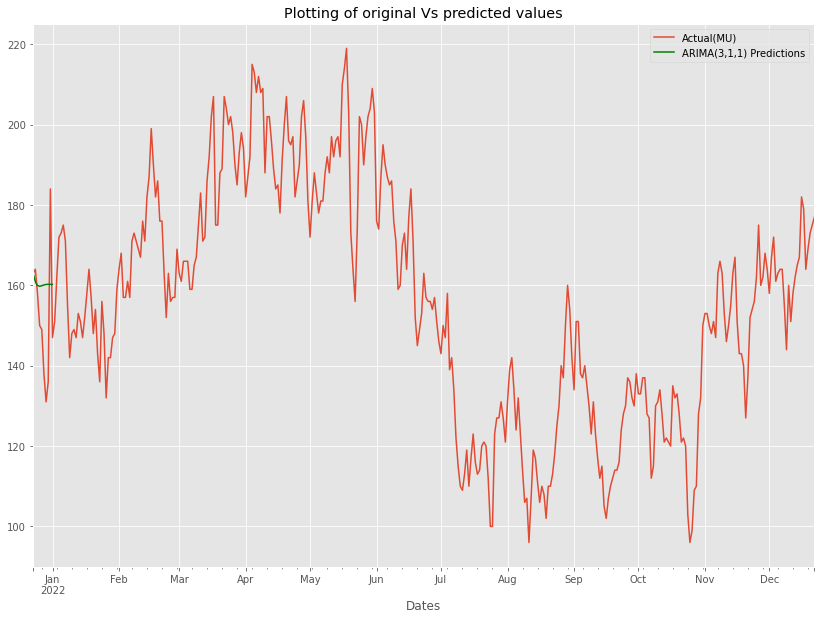

In [ ]:
train.plot(legend=True, label='train', figsize=(10,6))
plt.title('Training Data')
test.plot(legend=True, label='test')
predictions.plot(legend=True,color='g',figsize=(14,10))
plt.title('Plotting of original Vs predicted values')
#plt.figure(figsize=(10,12))

In [ ]:
df_org.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [ ]:
df=df_org[df_org['Power Station']=='Punjab'] 

In [ ]:
df['Dates']=pd.to_datetime(df['Dates'])
df.set_index('Dates',inplace=True)

In [ ]:
df = df.resample('D').first()

In [ ]:
df.head()

,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
Dates,,,,,,,,,,
2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0.0,39.0,17.0,-21.69,0.0
2017-09-02,Punjab,3826.3,2697.65,77.65,2620.0,0.0,39.0,13.0,-25.60,0.0
2017-09-03,Punjab,3826.3,48.40,48.40,0.0,0.0,39.0,13.0,-25.54,0.0
2017-09-04,Punjab,3826.3,48.40,48.40,0.0,0.0,39.0,14.0,-24.57,0.0
2017-09-05,Punjab,3826.3,48.40,48.40,0.0,0.0,39.0,14.0,-24.07,0.0


In [ ]:
df.isnull().sum()

Power Station                       82
Monitored Cap.(MW)                  82
Total Cap. Under Maintenace (MW)    82
Planned Maintanence (MW)            82
Forced Maintanence(MW)              82
Other Reasons (MW)                  82
Programme or Expected(MU)           82
Actual(MU)                          82
Excess(+) / Shortfall (-)           82
Deviation                           82
dtype: int64

In [ ]:
df.bfill(axis = 0,inplace=True)

In [ ]:
df[df.isna().any(axis=1)]

,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
Dates,,,,,,,,,,


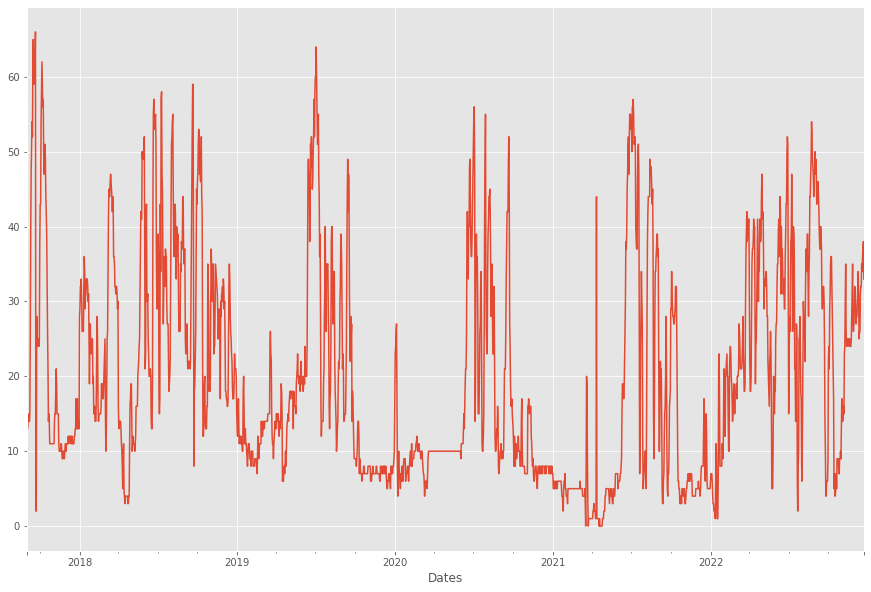

In [ ]:
df['Actual(MU)'].plot()

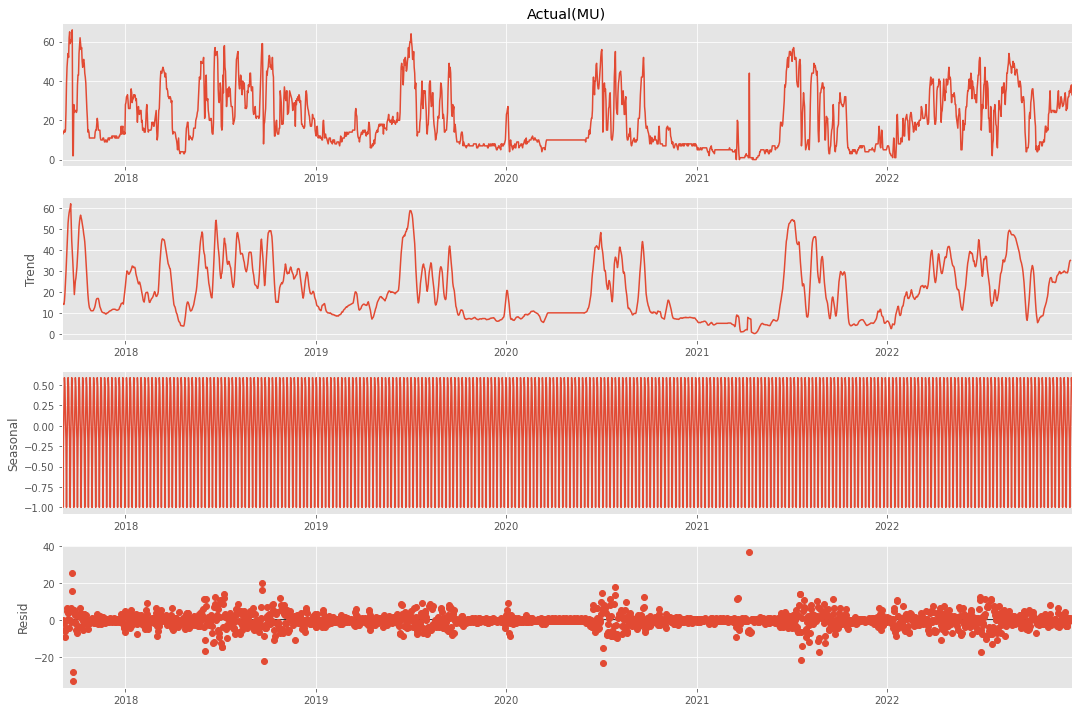

In [ ]:
seasonal_decompose(df['Actual(MU)'],model='additive').plot();

In [ ]:
adf_test(df['Actual(MU)'])

ADF :  -6.960215621184695
P-Value :  9.205690406566104e-10
Num Of Lags :  4
Num Of Observations Used For ADF Regression: 1934
Critical Values :
	 1% :  -3.433735729398985
	 5% :  -2.8630356049379273
	 10% :  -2.5675662008429145


In [ ]:
df = df[['Actual(MU)']]

In [ ]:
train =df.iloc[:len(df)-365]
test = df.iloc[-365:]

2021-12-23     8.882583
2021-12-24     8.723035
2021-12-25    10.506301
2021-12-26    10.337015
2021-12-27     9.420523
                ...    
2022-12-18    37.290192
2022-12-19    35.611826
2022-12-20    34.875330
2022-12-21    35.374477
2022-12-22    36.381934
Freq: D, Length: 365, dtype: float64


Text(0, 0.5, 'Actual(MU)')

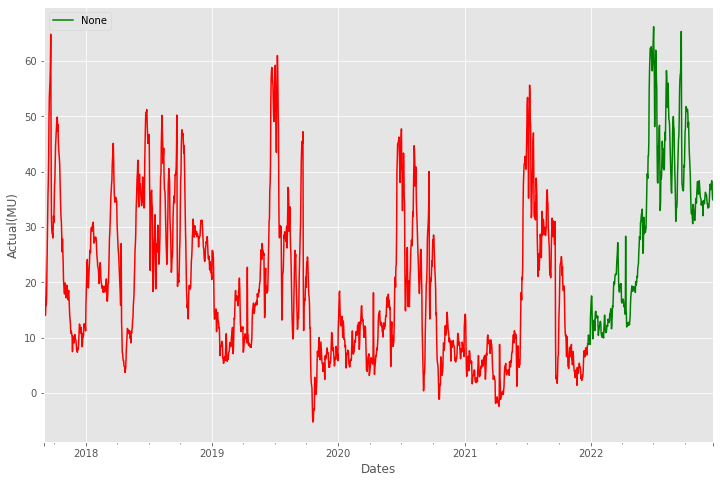

In [ ]:
model = ExponentialSmoothing(train, seasonal_periods= 365, trend = 'add', seasonal='add').fit(smoothing_level=.1,smoothing_slope=.02, smoothing_seasonal=.1)
model.fittedvalues.plot(color='red')
pred = model.forecast(365)
print(pred)
pred.plot(color='green',legend=True, figsize=(12,8))
plt.ylabel('Actual(MU)')

2021-12-23     8.654858
2021-12-24     8.415511
2021-12-25    10.122421
2021-12-26     9.877783
2021-12-27     8.881511
                ...    
2022-12-18     8.553237
2022-12-19     6.821467
2022-12-20     6.024037
2022-12-21     6.451005
2022-12-22     7.378067
Freq: D, Length: 365, dtype: float64


Text(0, 0.5, 'Actual(MU)')

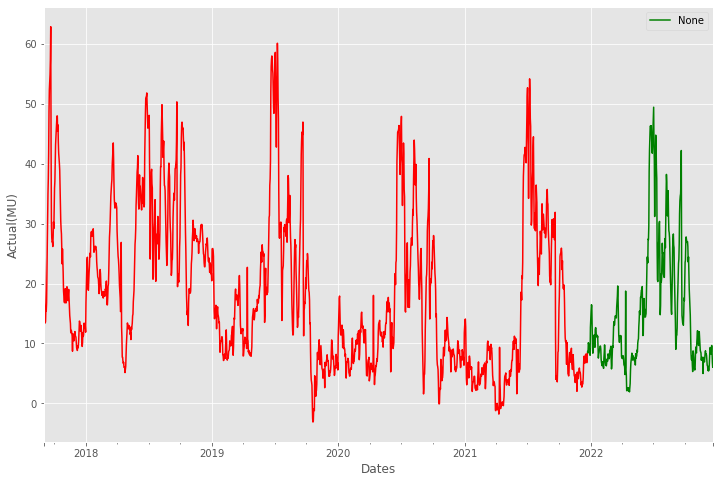

In [ ]:
model = ExponentialSmoothing(train, seasonal_periods= 365, trend = 'add', seasonal='add').fit(smoothing_level=.1, smoothing_seasonal=.1)
model.fittedvalues.plot(color='red')
pred = model.forecast(365)
print(pred)
pred.plot(color='green',legend=True, figsize=(12,8))
plt.ylabel('Actual(MU)')

In [ ]:
np.sqrt(mean_squared_error(test,pred))

16.94778717802491

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test,pred)

0.7513447692129057